# MULTIPLE LINEAR REGRESSION

### Step 1: Load Libraries and Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load dataset
df = pd.read_csv('ToyotaCorolla - MLR.csv')  # Replace with your file path
df.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


### Step 2: EDA and Preprocessing

In [3]:
# Check missing values
print(df.isnull().sum())

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


### Visualizations

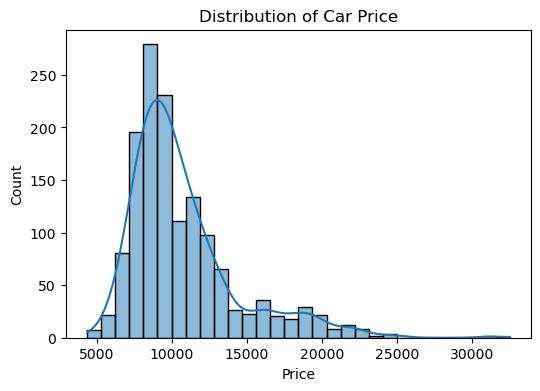

In [6]:
# Price distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title("Distribution of Car Price")
plt.show()

<Figure size 1000x800 with 0 Axes>

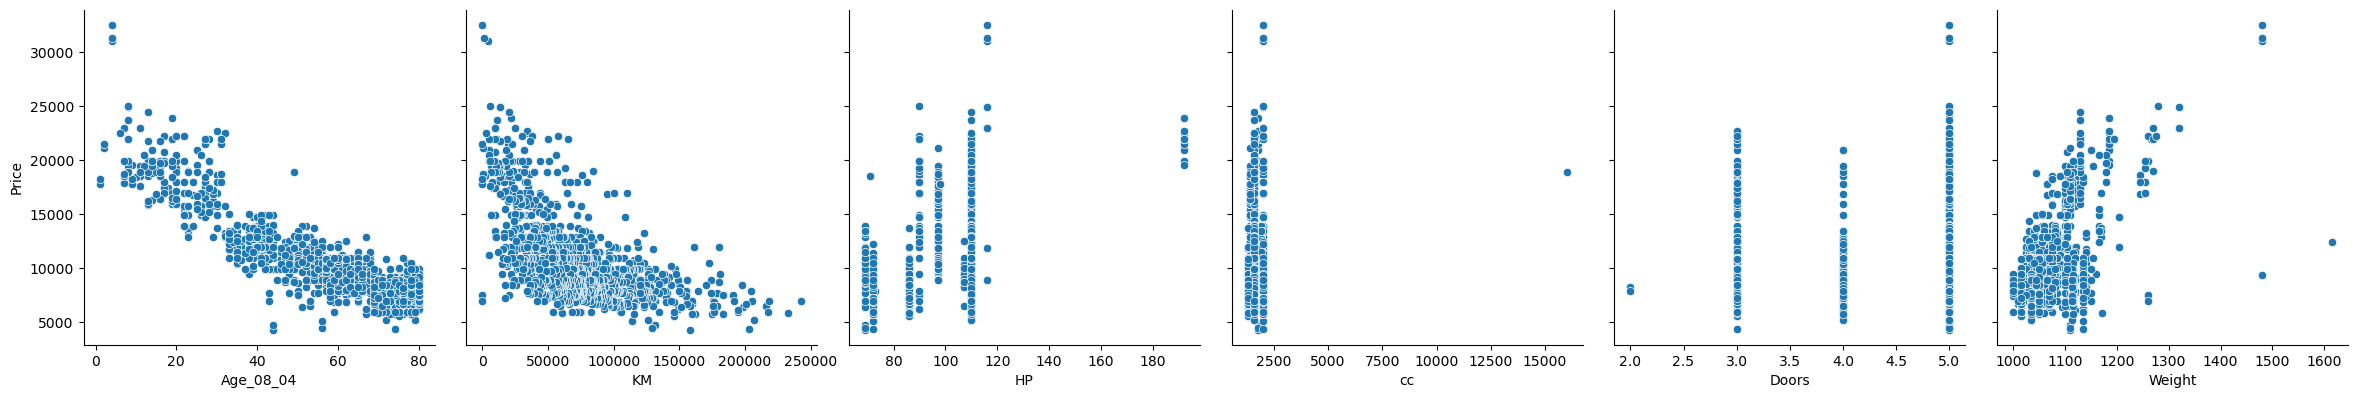

In [7]:
# Pairplot to see relations
plt.figure(figsize=(10,8))
sns.pairplot(df, x_vars=['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight'], 
             y_vars='Price', height=4, aspect=1, kind='scatter')
plt.show()


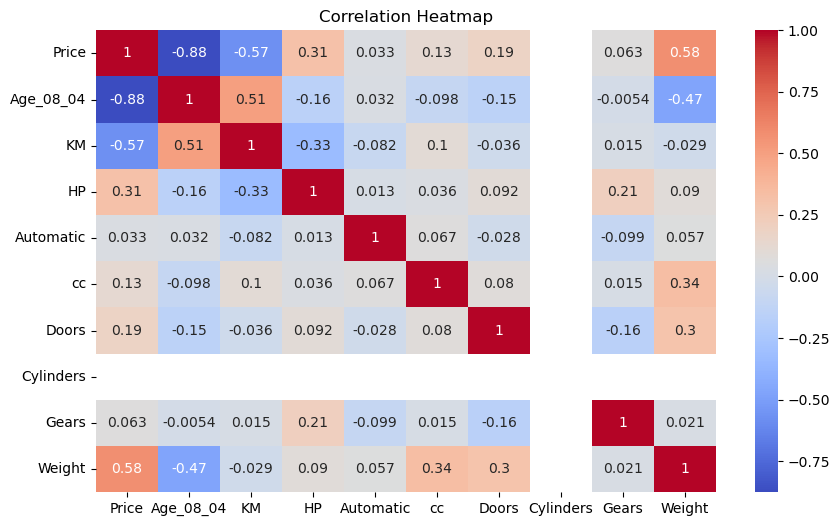

In [8]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


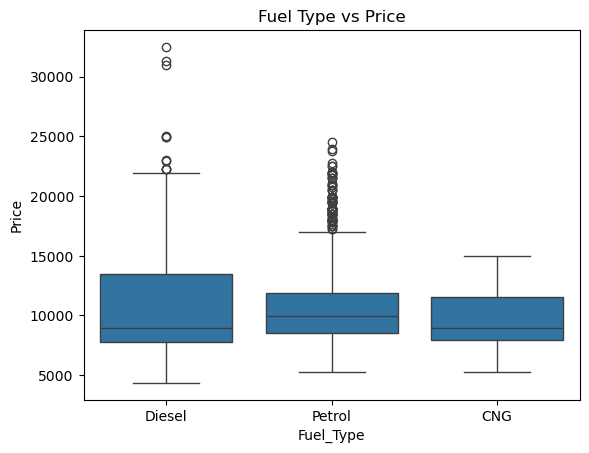

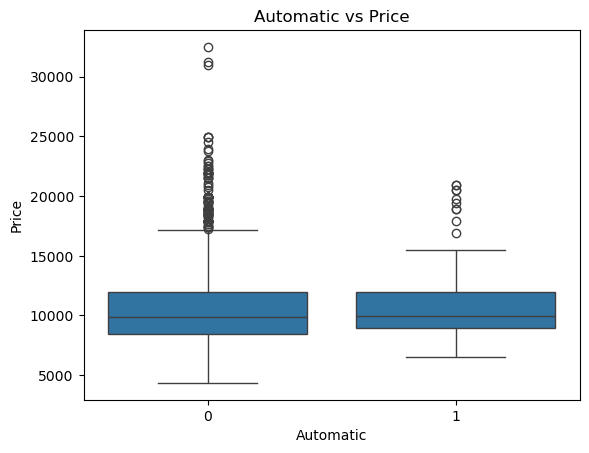

In [9]:
# Boxplots for categorical vs Price
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title("Fuel Type vs Price")
plt.show()

sns.boxplot(x='Automatic', y='Price', data=df)
plt.title("Automatic vs Price")
plt.show()

### Data Cleaning & Encoding

In [10]:
# Convert categorical 'FuelType' to dummy variables
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Check unique values in Doors
print(df['Doors'].value_counts())

# Convert 'Doors' to numeric (in case of strings like '3', '5')
df['Doors'] = pd.to_numeric(df['Doors'], errors='coerce')


Doors
5    674
3    622
4    138
2      2
Name: count, dtype: int64


### Feature Selection

In [11]:
features = ['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']
target = 'Price'

X = df[features]
y = df[target]


### Step 3: Split Data into Train/Test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 4: Model 1 - Basic MLR Model

In [13]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Coefficients
coefficients = pd.DataFrame(model1.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Predictions
y_pred1 = model1.predict(X_test)

# Evaluation
print("R2 Score:", r2_score(y_test, y_pred1))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred1)))


                  Coefficient
Age_08_04         -120.823078
KM                  -0.015927
HP                  15.777213
Automatic           93.081993
cc                  -0.030236
Doors              -84.483547
Weight              26.069186
Fuel_Type_Diesel     4.202110
Fuel_Type_Petrol  1453.694461
R2 Score: 0.8332952678447363
RMSE: 1491.4107550884648


### Step 5: Model 2 - Standardized Data

In [14]:
# Model 2: Drop highly correlated features (ex: Weight vs HP)
X2 = df[['Age_08_04', 'KM', 'HP', 'Automatic', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y_pred2 = model2.predict(X2_test)

print("Standardized R2 Score:", r2_score(y_test, y_pred2))
print("Standardized RMSE:", np.sqrt(mean_squared_error(y_test, y_pred2)))


Standardized R2 Score: 0.8384901505928277
Standardized RMSE: 1467.989038384814


 ### Step 6: Model 3 - Without Multicollinearity Features

In [15]:
# Model 3: Polynomial features on Age & KM
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X3 = poly.fit_transform(df[['Age_08_04','KM']])
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=42)
model3 = LinearRegression()
model3.fit(X3_train, y3_train)
y_pred3 = model3.predict(X3_test)

print("Reduced R2 Score:", r2_score(y_test, y_pred3))
print("Reduced RMSE:", np.sqrt(mean_squared_error(y_test, y_pred3)))


Reduced R2 Score: 0.8301968359016104
Reduced RMSE: 1505.2068839721849


### Step 7: Apply Lasso & Ridge

In [16]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge R2 Score:", r2_score(y_test, y_pred_ridge))

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso R2 Score:", r2_score(y_test, y_pred_lasso))


Ridge R2 Score: 0.8335556420169217
Lasso R2 Score: 0.8333180016667007


INTERVIEW QUESTIONS
1. What is Normalization & Standardization?
Normalization rescales values to a range of [0,1].
Standardization rescales to have a mean of 0 and standard deviation of 1.
Usefulness: Ensures fair comparison between features; especially important in distance-based or regularized models.

 ️2. Techniques to address multicollinearity:
Remove highly correlated features (high VIF)
Use PCA (Principal Component Analysis)
Use regularization methods (Ridge, Lasso) which penalize large coefficients.